In [1]:
using PyPlot

__Ejercicio 1:__ 

Se optó por implementar el método implícito de Euler haciendo uso del método de Newton.

In [2]:
#Definimos la función newton(f,df,x0), la cual tiene fomo argumentos la función f, su derivada (df) y la condición inicial (x0). El output de esta función es la raiz de f más cercana a x0.

function newton(f,df,x0)
    #Comenzamos tomando nuestra condición inicial
    x=x0;
    #Hacemos el for para aplicar el método de Newton 100 veces
    for i in 1:100
        x=x-f(x)/df(x)
    end
    #La función regresa el último valor de x obtenido
    return x
end;

In [3]:
#Definimos nuestro método implícito de Euler. Esta función tiene como argumentos la función f, su derivada respecto a x (dxf), la lista de t's (listt) y la condición inicial (x0).

function euler_imp(f,dxf,listt,x0)
    
#Definimos listx como un arreglo de zeros, con el mismo numero de entradas que listt
    listx=zeros(length(listt))

#Guardamos nuestra condición inicial en la primera entrada   
    listx[1]=x0

#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#El siguiente for es para ir guardando las sguientes entradas de listx
    for i in 1:length(listt)-1
        
#Definimos nuestra función g, dada por el método implícito, a la cual hay que encontrarle la raíz (que será nuestro x_{i+1})
    g(z)=z-f(z,listt[i+1])*h-listx[i]
        
#Derivamos respecto a z para definir la derivada de g
    dg(z)= 1-dxf(z,listt[i+1])*h  

#Aplicamos el método de Newton a g, tomando como condición inicial nuestra x_{i} y guardando el resultado (la raíz) como nuestro x_{i+1}.
    listx[i+1]=newton(g,dg,listx[i])    
        
    end
    
#La función regresa el arreglo de valores de x
    return listx
    
end;

Test:

Consideremos la ecuación diferencial
$$x'(t)-\sqrt{x(t)}=0.$$

Con $t \in (0,10)$ y con la condición inicial $x(0)=1$.

En este caso $f(x,t)=x'(t)=\sqrt{x}$.

Además, sabemos que la solución analítica será $x(t)=\dfrac{1}{4}t^{2}+t+1.$

In [4]:
#definimos la función que nos da la derivada
f(x,t)=sqrt(x);

#también necesitamos su derivada respecto a x

dxf(x,t)=1/(2*sqrt(x));

In [5]:
#Dividimos el intervalo (0,10) en subintervalos de longitud h=0.02
timelist=0:0.02:10;

In [6]:
#aplicamos el método y lo guardamos

euler_imp_solution_f=euler_imp(f,dxf,timelist,1);

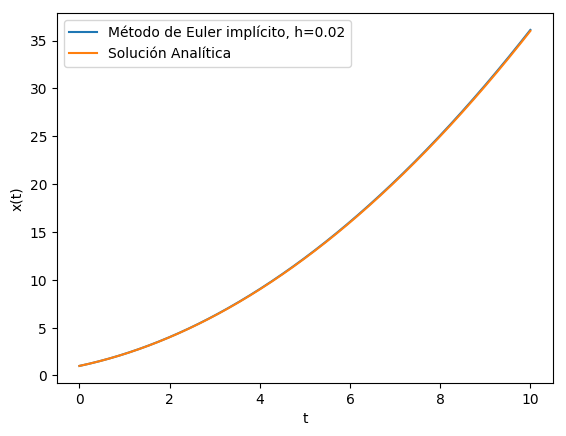

In [7]:
#Graficamos la solución exacta y nuestra solución con el método de Euler implícito

#graficamos la solución dada por nuestro método
plot(timelist,euler_imp_solution_f,label="Método de Euler implícito, h=0.02")

#graficamos la solución analítica (usamos .^ para que Julia sepa que estamos elevando al cuadrado las componentes de un arreglo)
plot(timelist,(1/4)*timelist.^2+timelist+1,label="Solución Analítica")

xlabel("t");
ylabel("x(t)");
legend();
show();

__Ejercicio 2:__ 

In [8]:
#Definimos el método del punto medio. Las entradas son: f, la función; listt, la lista de t's; y x0, el valor inicial.

function punto_medio(f,listt,x0)
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#Definimos listx como un arreglo de zeros, con el mismo numero de entradas que listt 
    listx=zeros(length(listt))
    
#Guardamos la condición inicial en la primera entrada de nuestra lista de x's
    listx[1]=x0
    
#El siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
       listx[i+1]= listx[i]+h*f(listx[i]+(h/2)*f(listx[i],listt[i]),listt[i]+h/2)
    end 
    
#la función regresa la lista de x's
    return listx
    
end;

Test:

Usamos la misma f, el mismo intervalo y la misma condición inicial que en el test del ejercicio 1.

In [9]:
#Aplicamos nuestro método
punto_medio_f_solution=punto_medio(f,timelist,1);

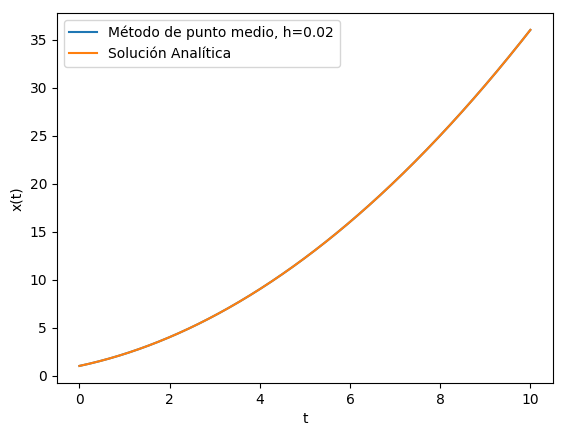

In [10]:
#Graficamos la solución exacta y nuestra solución con el método del punto medio

#graficamos la solución dada por nuestro método
plot(timelist,punto_medio_f_solution,label="Método de punto medio, h=0.02")

#graficamos la solución analítica (usamos .^ para que Julia sepa que estamos elevando al cuadrado las componentes de un arreglo)
plot(timelist,(1/4)*timelist.^2+timelist+1,label="Solución Analítica")

xlabel("t");
ylabel("x(t)");
legend();
show();

__Ejercicio 3:__

In [11]:
#Definimos la función que aplica el método de Runge-Kutta de orden 4. Las entradas son: f, la función; listt, la lista de t's; y x0, la condición inicial.

function runge_kutta_4(f,listt,x0)
    
#Definimos listx como un arreglo de zeros, con el mismo numero de entradas que listt 
    listx=zeros(length(listt))
    
#Guardamos la condición inicial en la primera entrada de nuestra lista de x's
    listx[1]=x0
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#El siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        k1=f(listx[i],listt[i])
        k2=f(listx[i]+(h/2)*k1,listt[i]+h/2)
        k3=f(listx[i]+(h/2)*k2,listt[i]+h/2)
        k4=f(listx[i]+h*k3,listt[i+1])
        
#Vamos guardando nuestras x's en listx
        listx[i+1]=listx[i]+(h/6)*(k1+2*k2+2*k3+k4)
        
    end
      
#El método devuelve el arreglo de x's   
    return listx
    
end;

Test:

Usamos la misma ecuación, el mismo intervalo y las misma condición inicial que en los casos anteriores.

In [12]:
#aplicamos el método

runge_kutta_f_solution=runge_kutta_4(f,timelist,1);

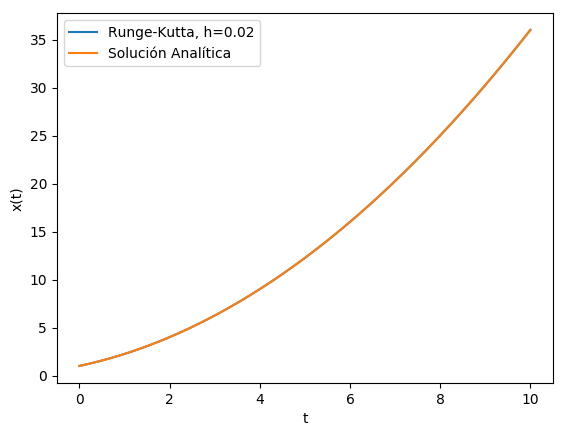

In [13]:
#Graficamos la solución exacta y nuestra solución con el método de Runge-Kutta de orden 4

#graficamos la solución dada por nuestro método
plot(timelist,runge_kutta_f_solution,label="Runge-Kutta, h=0.02")

#graficamos la solución analítica (usamos .^ para que Julia sepa que estamos elevando al cuadrado las componentes de un arreglo)
plot(timelist,(1/4)*timelist.^2+timelist+1,label="Solución Analítica")

xlabel("t");
ylabel("x(t)");
legend();
show();

__Ejercicio 5:__

Queremos resolver $$\frac{dx}{dt}=-\alpha x,$$ con $\alpha= -2.5$ y $t\in(0,8)$.

In [14]:
#Definimos la función que representa la derivada
H(x,t)= -2.5x;

a)Para la condición inicial $x(0)=1.$

In [15]:
#Definimos los distintos arreglos de t's

#Para h=1
listt1=0:1:8
#Para h=0.5
listt2=0:0.5:8
#Para h=0.2
listt3=0:0.2:8
#Para h=0.01
listt4=0:0.01:8;

In [16]:
#Para h=1.0
solution_1_1=runge_kutta_4(H,listt1,1.0);
#Para h=0.5
solution_1_2=runge_kutta_4(H,listt2,1.0);
#Para h=0.2
solution_1_3=runge_kutta_4(H,listt3,1.0);
#Para h=0.01
solution_1_4=runge_kutta_4(H,listt4,1.0);

Con esta condición inicial, se obtiene que la solución exacta es:
$$x(t)=e^{-2.5 t}.$$ La cual usaremos para comparar la convergencia de las diferentes $h's$.

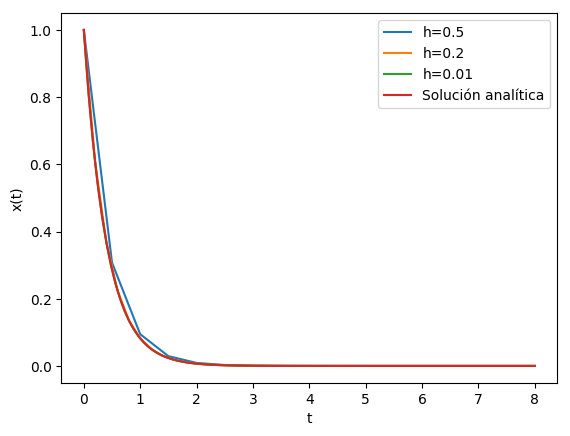

In [17]:
#Graficamos para distintas las distintas h's (a excepción de h=!º)

plot(listt2,solution_1_2,label="h=0.5");
plot(listt3,solution_1_3,label="h=0.2");
plot(listt4,solution_1_4,label="h=0.01");


#Para graficar la solución analítica, dividimos el intervalo (0,8) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
plot(linspace(0,8,100),e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();


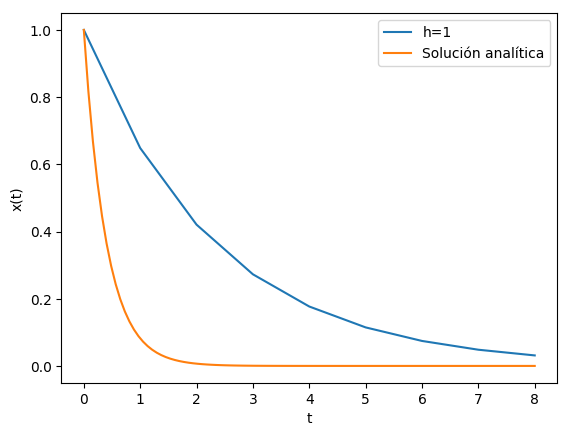

In [18]:
#Graficamos de forma independiente para h=1, pero llevando a cabo los mismos pasos.

plot(listt1,solution_1_1,label="h=1");
plot(linspace(0,8,100),e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();



b)Para la condición inicial $x(0)=2.$

In [19]:
#Usamos los mismos arreglos de t's

#Para h=1.0
solution_2_1=runge_kutta_4(H,listt1,2.0);
#Para h=0.5
solution_2_2=runge_kutta_4(H,listt2,2.0);
#Para h=0.2
solution_2_3=runge_kutta_4(H,listt3,2.0);
#Para h=0.01
solution_2_4=runge_kutta_4(H,listt4,2.0);

En este caso se obtiene que la solución analítica es :
$$x(t)=2 e^{-2.5 t}.$$ La cual usaremos para comparar la convergencia de las diferentes $h's$.

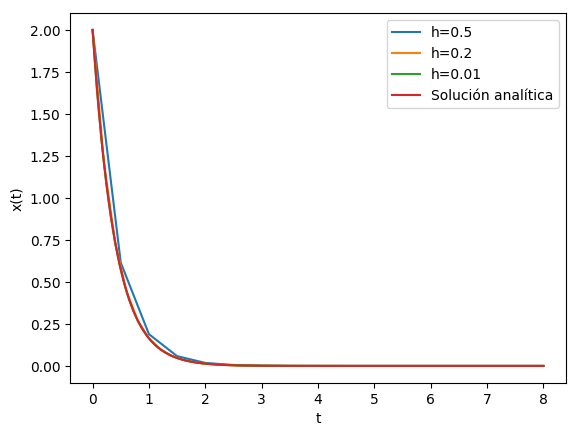

In [20]:
#Graficamos para distintas las distintas h's (a excepción de h=!º)

plot(listt2,solution_2_2,label="h=0.5");
plot(listt3,solution_2_3,label="h=0.2");
plot(listt4,solution_2_4,label="h=0.01");


#Para graficar la solución analítica, dividimos el intervalo (0,8) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
plot(linspace(0,8,100),2*e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();

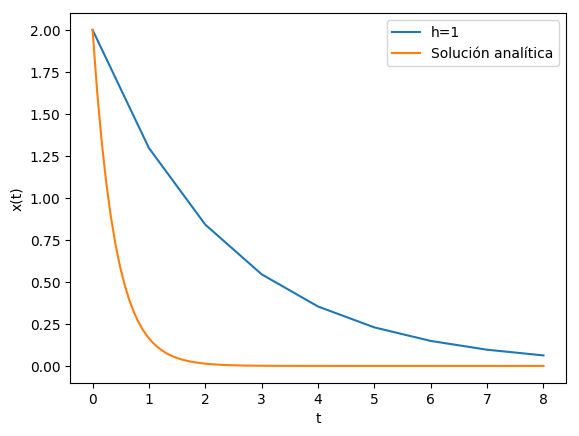

In [21]:
#Graficamos de forma independiente para h=1, pero llevando a cabo los mismos pasos.

plot(listt1,solution_2_1,label="h=1");
plot(linspace(0,8,100),2*e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();


__Ejercicio 6__: 

Queremos resolver la ecuación $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$

Cuya solución analítica, sabemos que es $x(t)=4+8t-5t^2$, cuando $x(0)=4$.
Además escogemos $t\in(0,12)$

In [22]:
# Definimos la función que nos da la derivada
w(x,t)=(2x-18t)/(1+t);

In [23]:
#Definimos los arreglos de t's

#Para t=0.5
timelist1=0:0.5:12
#Para t=0.2
timelist2=0:0.2:12
#Para t=0.01
timelist3=0:0.01:12
#Para t=0.001
timelist4=0:0.001:12;

a) Punto medio

In [24]:
#Aplicamos nuestro método para diferentes h's (dadas por las listas de t's)

#h=0.5
pm_sol_1=punto_medio(w,timelist1,4.0);
#h=0.2
pm_sol_2=punto_medio(w,timelist2,4.0);
#h=0.01
pm_sol_3=punto_medio(w,timelist3,4.0);
#h=0.001
pm_sol_4=punto_medio(w,timelist4,4.0);

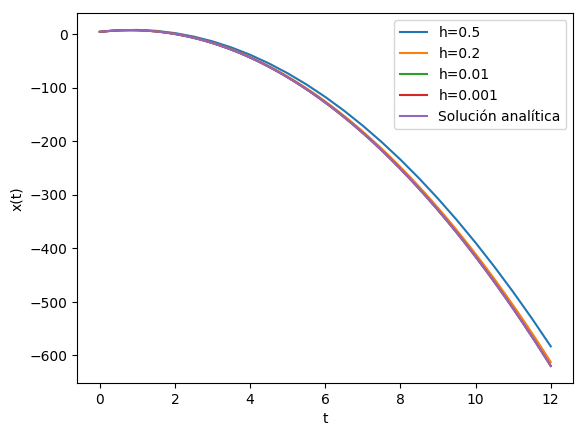

In [25]:
#Graficamos las soluciones para las distintas h's

plot(timelist1,pm_sol_1,label="h=0.5");
plot(timelist2,pm_sol_2,label="h=0.2");
plot(timelist3,pm_sol_3,label="h=0.01");
plot(timelist4,pm_sol_4,label="h=0.001");

#Para graficar la solución analítica, dividimos el intervalo (0,12) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución analítica");
xlabel("t");
ylabel("x(t)");


legend();
show();


b) Runge-Kutta

In [26]:
#Aplicamos nuestro método para diferentes h's (dadas por las listas de t's)

#h=0.5
rk_sol_1=runge_kutta_4(w,timelist1,4.0);
#h=0.2
rk_sol_2=runge_kutta_4(w,timelist2,4.0);
#h=0.01
rk_sol_3=runge_kutta_4(w,timelist3,4.0);
#h=0.001
rk_sol_4=runge_kutta_4(w,timelist4,4.0);


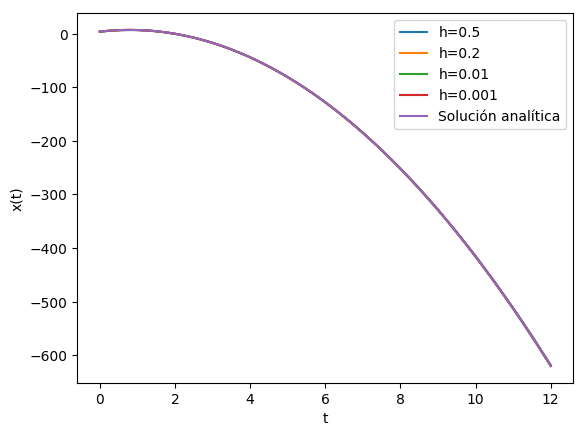

In [27]:
#Graficamos las soluciones para las distintas h's

plot(timelist1,rk_sol_1,label="h=0.5");
plot(timelist2,rk_sol_2,label="h=0.2");
plot(timelist3,rk_sol_3,label="h=0.01");
plot(timelist4,rk_sol_4,label="h=0.001");

#Para graficar la solución analítica, dividimos el intervalo (0,12) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución analítica");
xlabel("t");
ylabel("x(t)");


legend();
show();


__Ejercicio 7__:

In [28]:
#Definimos el método de Euler para funciones de cualquier dimensión. Las entradas son: f, la función que nos da la derivada;listt,el arreglo de t's; y x0, el valor inicial.

function euler_method(f,listt,x0)
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#Definimos x como nuestro valor inicial (arreglo de valores iniciales)
    x=x0
#Definimos listx como un objeto de tipo indefinido. Aquí es donde iremos guardando los puntos de la solución.
    listx=[]
    
#Guardamos nuestro valor inicial en listx
    push!(listx,x)

#el siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        
#Recordemos que el valor inicial de x es x0, por lo que el rango de i es correcto.
        x = x + f(x,listt[i])*h
        
#Cada que aplicamos la relación de recurrencia, vamos guardando el punto en listx.
        push!(listx,x) 
    end
#la función regresa el arreglo de x's
    return listx
end;

In [29]:
#Definimos el método de Runge-Kutta de orden 4 para funciones de cualquier dimensión. Las entradas son: f, la función que nos da la derivada;listt,el arreglo de t's; y x0, el valor inicial.
function r_k_4(f,listt,x0)
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
#Definimos x como nuestro valor inicial (arreglo de valores iniciales)    
    x=x0
    
#Definimos listx como un objeto de tipo indefinido. Aquí es donde iremos guardando los puntos de la solución.
    listx=[]
    
#Guardamos nuestro valor inicial en listx
    push!(listx,x)

#el siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+h/2)
        k3=f(x+(h/2)*k2,listt[i]+h/2)
        k4=f(x+h*k3,listt[i+1])
        
        x=x+(h/6)*(k1+2*k2+2*k3+k4)
        
 #Cada que aplicamos la relación de recurrencia, vamos guardando el punto en listx.       
        push!(listx,x)
    end
#la función regresa el arreglo de x's
    return listx
end;

Queremos resolver $\ddot{x}(t)=-kx(t).$ Como se vio en la tarea 11, esta ecuación es quivalente al sistema de ecuaciones acopladas:
$$\dot{x}=u$$
$$\dot{u}=-kx.$$

Usaremos el método de Euler en su forma vectorial, donde se tiene la expresión $$\frac{d\vec{x}}{dt}=\vec{g}(\vec{x},t).$$

En este caso $\vec{x}=(x,u)$ y $\vec{g}(\vec{x},t)=(u,-kx)$. 

Recordemos que $k$=$\frac{k'}{m}$, donde $k'$ es la constante del resorte y $m$ es la masa. En este caso, escojemos $k'=1$, $m=1$; de modo que $k=1$. Además, escogemos $\vec{x}(0)=(x(0),u(0))=(3,6)$ y $t \in (0,12).$

In [30]:
#Definimos la ecuación que nos da la derivada
F(x,t)=[x[2],-x[1]];

Por otra parte,  sabemos que la solución analítica es $$x(t)=3cos(t)+6sin(t).$$

Y la energía total debe ser 
$$E=T+U=\frac{1}{2}m\dot{x}^{2}+\frac{1}{2}k'x^{2}.$$

Sustituyendo la solución de $x$ y recordando que $k'=m=1$, tenemos que


$$E=\frac{1}{2}\left(-3sin(t)+6cos(t)\right)^{2}+\frac{1}{2}\left(3cos(t)+6sin(t)\right)^{2}$$
$$\implies E=\frac{1}{2} \left( 9sin^{2}(t)+36cos^{2}(t)-18sin(t)cos(t)+9cos^{2}(t)+36sin^{2}(t)+18sin(t)cos(t)\right)$$

$$\therefore \ E= 22.5$$

a) Método de Euler

In [31]:
#Usamos las mismas listas de t's que en el ejercicio 6

#h=0.5
euler_sol_1=euler_method(F,timelist1,[3,6]);
#h=0.2
euler_sol_2=euler_method(F,timelist2,[3,6]);
#h=0.01
euler_sol_3=euler_method(F,timelist3,[3,6]);
#h=0.001
euler_sol_4=euler_method(F,timelist4,[3,6]);

In [32]:
#Tomando en cuenta que cada entrada del arreglo de x's que regresa euler_method está compuesto, en este caso, por un pareja (la posición y la velocidad), usamos map para "extraer" la entrada que necesitamos. Aquí se usa la ecuación de la energía dada arriba. Vamos guardadno las listas que nos dan la energía en cada punto para diferentes h's.

#h=0.5
energy_euler_1= (1/2)*(map(x->x[1],euler_sol_1)).^2 +(1/2)*(map(x->x[2],euler_sol_1)).^2 ;
#h=0.2
energy_euler_2= (1/2)*(map(x->x[1],euler_sol_2)).^2 +(1/2)*(map(x->x[2],euler_sol_2)).^2 ;
#h=0.01
energy_euler_3= (1/2)*(map(x->x[1],euler_sol_3)).^2 +(1/2)*(map(x->x[2],euler_sol_3)).^2 ;
#h=0.001
energy_euler_4= (1/2)*(map(x->x[1],euler_sol_4)).^2 +(1/2)*(map(x->x[2],euler_sol_4)).^2 ;

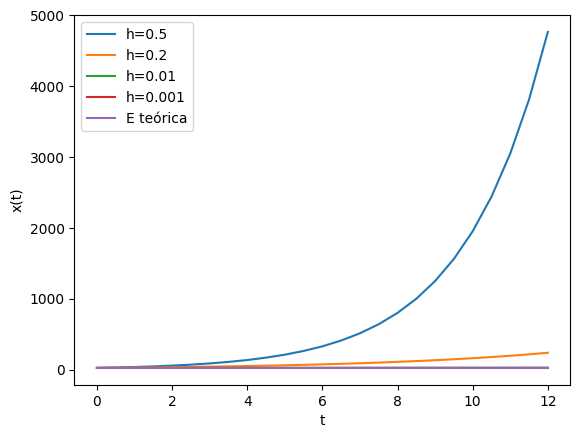

In [33]:
#Graficamos la energía para las distintas h's
plot(timelist1,energy_euler_1,label=("h=0.5"))
plot(timelist2,energy_euler_2,label=("h=0.2"))
plot(timelist3,energy_euler_3,label=("h=0.01"))
plot(timelist4,energy_euler_4,label=("h=0.001"))

#Graficamos la energía teórica
plot([0,12],[22.5,22.5],label=("E teórica"))

xlabel("t");
ylabel("x(t)");
legend();
show();

Notamos que para $h=0.5$ no se aleja demasiado de la recta esperada. De hecho, por la forma de la curva, la energía parecería diverger cuando $t\rightarrow \infty$, lo cual no es físicamente posible. Por esta razón, usar $h=0.5$ es una mala aproximación.
Notamos además que para las demás $h's$ las gráficas sí parecen ser rectas, cuya pendiente se acerca más a cero a medida que $h$ disminuye. De hecho, por la escala mostrada, las gráficas para $h=0.01$ y $h=0.001$ parecen coincidir con la recta teórica.

b) Método de Runge-Kutta

In [34]:
#Usamos las mismas listas de t's que en el ejercicio 6

#h=0.5
rk_sol_1=r_k_4(F,timelist1,[3,6]);
#h=0.2
rk_sol_2=r_k_4(F,timelist2,[3,6]);
#h=0.01
rk_sol_3=r_k_4(F,timelist3,[3,6]);
#h=0.001
rk_sol_4=r_k_4(F,timelist4,[3,6]);


In [35]:
#Definimos los arreglos de energía de forma análoga al inciso a).

#h=0.5
energy_rk_1= (1/2)*(map(x->x[1],rk_sol_1)).^2 +(1/2)*(map(x->x[2],rk_sol_1)).^2 ;
#h=0.2
energy_rk_2= (1/2)*(map(x->x[1],rk_sol_2)).^2 +(1/2)*(map(x->x[2],rk_sol_2)).^2 ;
#h=0.01
energy_rk_3= (1/2)*(map(x->x[1],rk_sol_3)).^2 +(1/2)*(map(x->x[2],rk_sol_3)).^2 ;
#h=0.001
energy_rk_4= (1/2)*(map(x->x[1],rk_sol_4)).^2 +(1/2)*(map(x->x[2],rk_sol_4)).^2 ;


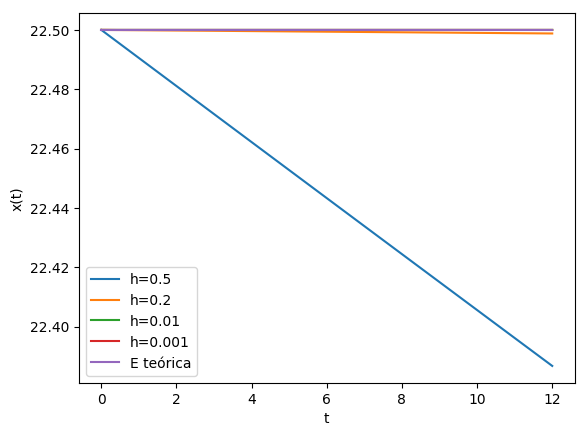

In [36]:
#Graficamos la energía para las distintas h's
plot(timelist1,energy_rk_1,label=("h=0.5"))
plot(timelist2,energy_rk_2,label=("h=0.2"))
plot(timelist3,energy_rk_3,label=("h=0.01"))
plot(timelist4,energy_rk_4,label=("h=0.001"))

#Graficamos la energía teórica
plot([0,12],[22.5,22.5],label=("E teórica"))

xlabel("t");
ylabel("x(t)");
legend();
show();

En esta ocasión, en todos los casos la curva resultante es un recta. Sin embargo, nuevamente $h=0.5$ es problemático, ya que posee una pendiente muy pronunciada, por lo cual no puede ser considerada como una buena aproximación. Nótese que la curva correspondiente a $h=0.2$ posee una pendiente mucho menor, mientras que para $h=0.01$ y $h=0.001$, las curvas coinciden con la recta teórica, al menos en la escala mostrada. Más aún, esta escala es mucho menor a la mostrada en la gráfica anterior.

c) Comparación de ambos métodos

Dadas las observaciones anteriores, ssamos sólo los resultados para $h=0.01$ y $h=0.001$ que es obtuvieron con cada método, para así compararlos.

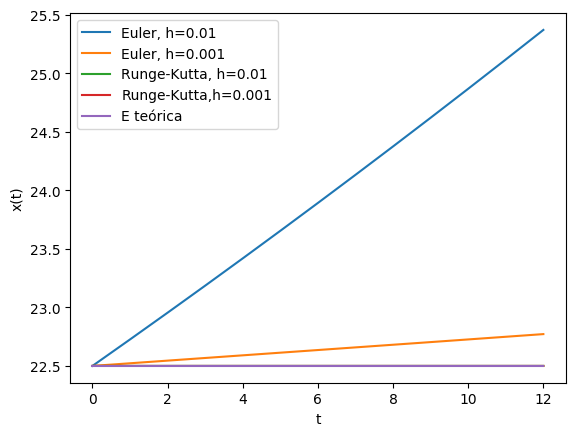

In [37]:
#Para el método de Euler, graficamos la energía para las distintas h's
plot(timelist3,energy_euler_3,label=("Euler, h=0.01"))
plot(timelist4,energy_euler_4,label=("Euler, h=0.001"))

#Para el método de Runge-Kutta, graficamos la energía para las distintas h's
plot(timelist3,energy_rk_3,label=("Runge-Kutta, h=0.01"))
plot(timelist4,energy_rk_4,label=("Runge-Kutta,h=0.001"))

#Graficamos la energía teórica
plot([0,12],[22.5,22.5],label=("E teórica"))

xlabel("t");
ylabel("x(t)");
legend();
show();


Con esta gráfica podemos darnos cuenta de que la gráfica del método de Euler resultó un tanto engañosa (por la escala), ya que las curvas correspondientes a este método en realidad poseen una pendiente pronunciada a comparación de las curvas obtenidas con Runge-Kutta. Estas últimas continuan sobreponiendose a la recta de la energía teórica, es decir, su pendiente es muy cercana a cero. De esta manera, se corrobora que el error obtenido con el método de Runge-Kutta de orden 4 es menor al error obtenido con el método de Euler.
